# Inference for numerical data

In [5]:
library(statsr)
library(dplyr)
library(ggplot2)
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



In [6]:
data(nc)

In [7]:
describe(nc)

nc 

 13  Variables      1000  Observations
--------------------------------------------------------------------------------
fage 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     829      171       37    0.998    30.26    7.673       20       21 
     .25      .50      .75      .90      .95 
      25       30       35       39       42 

lowest : 14 16 17 18 19, highest: 47 48 50 53 55
--------------------------------------------------------------------------------
mage 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       33    0.998       27    7.103       18       19 
     .25      .50      .75      .90      .95 
      22       27       32       35       37 

lowest : 13 14 15 16 17, highest: 41 42 45 46 50
--------------------------------------------------------------------------------
mature 
       n  missing distinct 
    1000        0        2 
                                  
Value       mature mom you

In [8]:
str(nc)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1000 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2

In [9]:
summary(nc$gained)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   30.00   30.33   38.00   85.00      27 

# Q: How many mothers are we missing weight gain data from?

# A: 27

# Q: Make side-by-side boxplots of habit and weight. Which of the following is false about the relationship between habit and weight?

- Median birth weight of babies born to non-smoker mothers is slightly higher than that of babies born to smoker mothers.
- Range of birth weights of babies born to non-smoker mothers is greater than that of babies born to smoker mothers.
- Both distributions are extremely right skewed.
- The IQRs of the distributions are roughly equal.

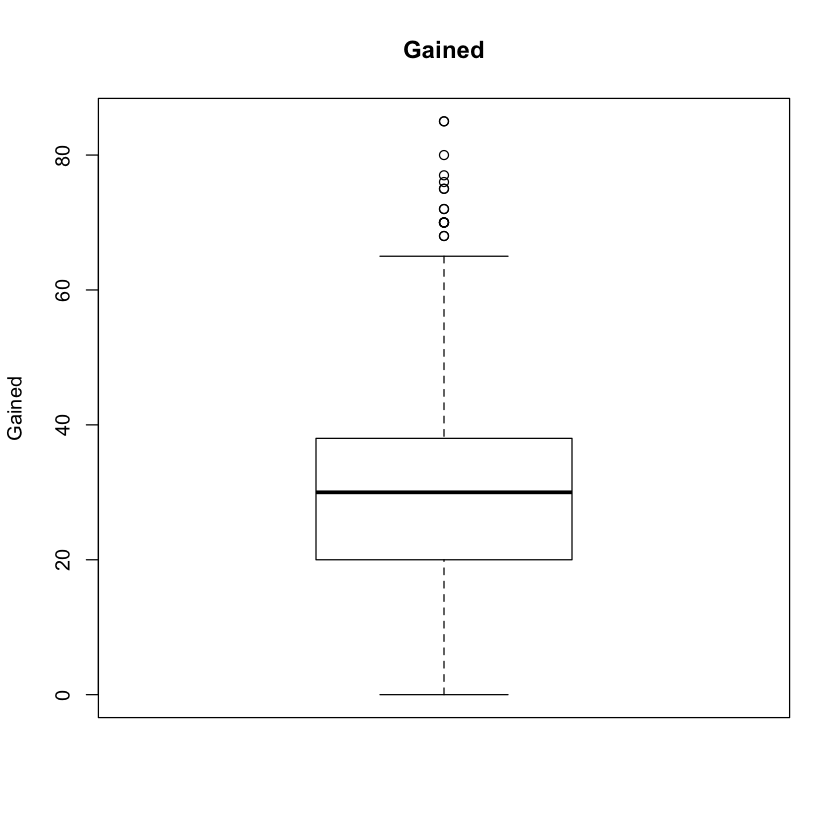

In [12]:
boxplot(
    nc$gained,
    data=nc,
    main="Gained", 
    ylab="Gained"
)

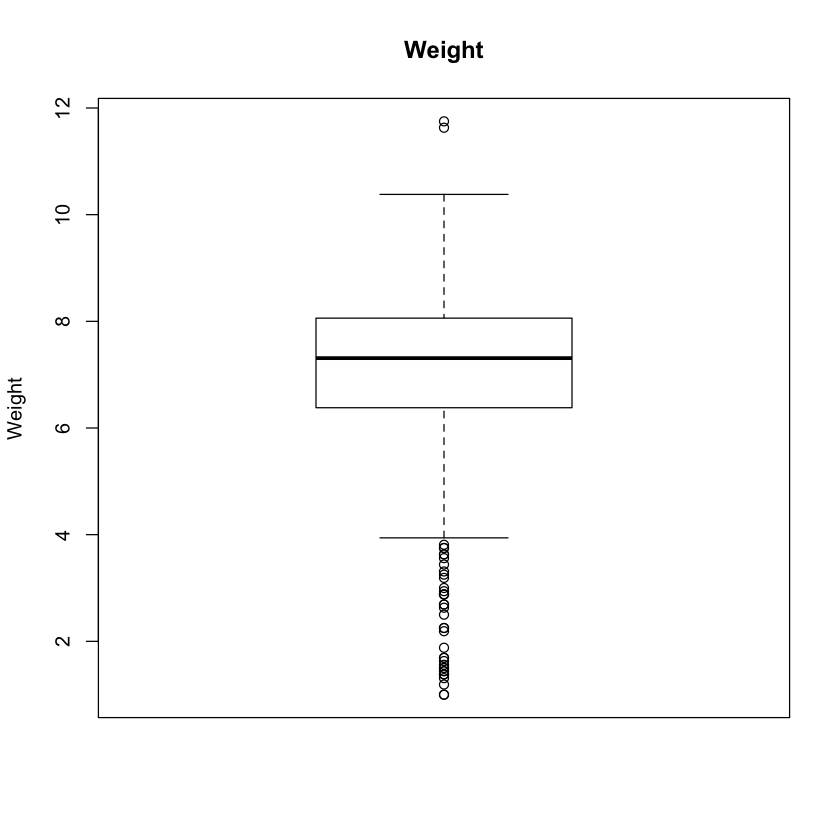

In [13]:
boxplot(
    nc$weight,
    data=nc,
    main="Weight", 
    ylab="Weight"
)

# A: TODO

In [14]:
nc %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

habit,mean_weight
nonsmoker,7.144273
smoker,6.828730
NA,3.630000


# Q: Are all conditions necessary for inference satisfied? Comment on each. You can compute the group sizes using the same by command above but replacing mean(weight) with n().